#                               Simple Linear Regression Model

## predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
### What will be predicted score if a student study for 9.25 hrs in a day?

### Steps involved in the whole process after problem statement given
    1. Read Data
    2. Variable Identification-- ID will be ignored during modeling, target is the dependent variable, rest others are 
       independent variables used for model building
    3. Univariate Analysis-- Tabular method-describe() for continous ; value_counts for categorical,
        Graphical-histogram/Boxplot/
    4. Bivariate Analysis-- For continous -continous variables-- scatter plot,corr() 
                            For continous-categorical variables-- Bar plot,2 sample t test
                            For categorical-categorical variables-- crosstab,chisquare test
                            
    5. Missing value--Impute
    6. Outlier --transform or Binning 
    7. Variable Transformation-- log/standard scalar/
    8. Model Building-- Classification --Logistic Regresssion/Decision Tree

### 1 . Read the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
# Understand the shape and size of data
data.shape

(25, 2)

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 2. Identify the dependent and independent variables
#### In this case hours is independent and scores is dependent variable

In [7]:
X=data['Hours'].values
y=data['Scores'].values

### 3.Univariate Analysis

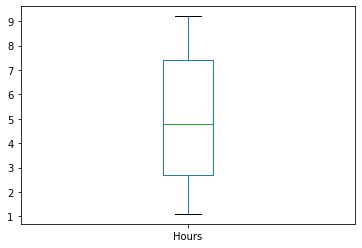

In [9]:
# No outliers
data['Hours'].plot.box()

### 4. Bivariate Analysis
#### The scatter plot values are seen to be following linear line path

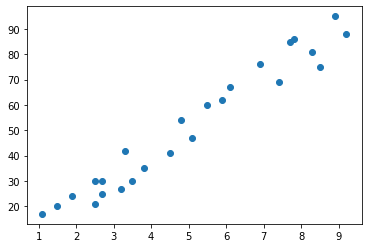

In [10]:
plt.scatter(X,y)


### 5.Missing value 
#### Since there are no missing values, no need of this step

### 6 .Outlier value 
#### Since there are no outliers, no need of this step

### 7.Transformations on values 
#### Since there are no missing or outliers, no need of this step

### 8. Model Building

#### Since the ouput value has to be continous we go for linear regression

In [16]:
m=len(X)
n=len(y)
# We reshape the 
X=X.reshape(m,1)
y=y.reshape(n,1)
reg=LinearRegression()

reg=reg.fit(X,y)
y_pred=reg.predict(X)

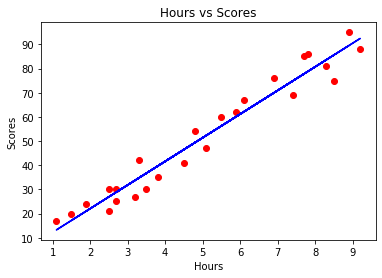

In [17]:
# PLotting the linear regresion line 
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()# to show end of plot

###  Model Evaluation


In [29]:
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y,y_pred))
print('RMSE',rmse)
R2=r2_score(y,y_pred)
print('R2  is',R2)

RMSE 5.374265578592619
R2  is 0.9529481969048356


### R2 is 95.29% means model is able to predict salary 95.29% accurately.. so error only is 4.8 %... So we can conclude that model is very well explaining relationship between x and y.model is good

###  Trying Lasso and Ridge models for model improvement

In [40]:
from sklearn.linear_model import Ridge,Lasso
rid=Ridge(alpha=0.01,normalize=True)
mod2=rid.fit(X,y)
lasso=Lasso(alpha=0.01,normalize=True)
mod3=lasso.fit(X,y)

In [41]:
y_pred_ridge=mod2.predict(X)
y_pred_lasso=mod3.predict(X)

In [48]:
rmse=np.sqrt(mean_squared_error(y,y_pred_lasso))
print('RMSE',rmse)
R2=r2_score(y,y_pred_lasso)
print('R2  is',R2)

RMSE 5.374498163479588
R2  is 0.9529441242459953


In [51]:
rmse=np.sqrt(mean_squared_error(y,y_pred_ridge))
print('RMSE',rmse)
R2=r2_score(y,y_pred_ridge)
print('R2  is',R2)

RMSE 5.379597994308221
R2  is 0.952854779769564


###  As we can see the RMSE and R2 values are almost same for all 3 cases

In [ ]:
print('Predicted score if a student studies for 9.25 hrs in a day is',round((reg.coef_[0][0]*9.25+reg.intercept_[0])))
print('Predicted score if a student studies for 9.25 hrs in a day is',round((mod2.coef_[0][0]*9.25+mod2.intercept_[0])))
print('Predicted score if a student studies for 9.25 hrs in a day is',round((mod3.coef_[0]*9.25+mod3.intercept_[0])))

### As we can see the predicted values are same for Lasso and normal Linear Regression models whereas 1 marks less for Ridge Linear Regression model
### Predicted score if a student studies for 9.25 hrs in a day is 93.0